In [1]:
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils


Using TensorFlow backend.


In [2]:
keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(x_Train, y_Train), (x_Test, y_Test) = keras.datasets.mnist.load_data()

In [4]:
print('x_train_image:',x_Train.shape)
print('y_train_label:',y_Train.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [5]:
print('x_test_image:',x_Test.shape)
print('y_test_label:',y_Test.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


In [6]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

In [7]:
x_Train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

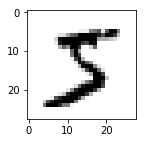

In [8]:
plot_image(x_Train[0])

In [9]:
y_Train[0]

5

In [10]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

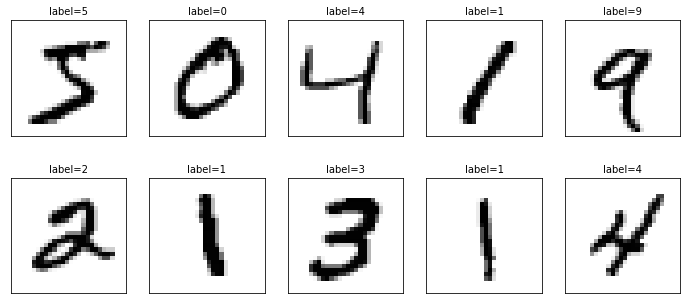

In [11]:
plot_images_labels_prediction(x_Train,y_Train,[],0,10)

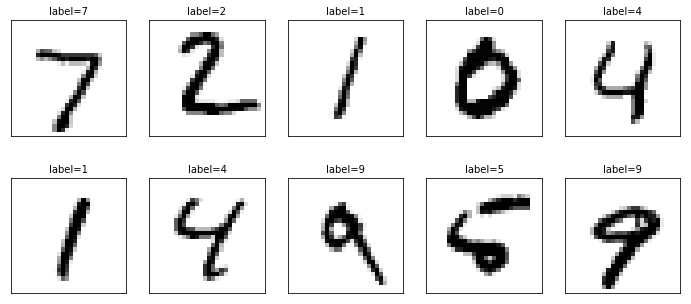

In [12]:
plot_images_labels_prediction(x_Test,y_Test,[],0,10)

In [13]:
#每一張圖片是28 x 28 = 784 個數字來紀錄
x_Train.shape

(60000, 28, 28)

In [14]:
# 多加一個顏色的維度 
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [15]:
x_Train4D.shape

(60000, 28, 28, 1)

In [16]:
# 將數值縮小到0~1
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [17]:
# 把類別做Onehot encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [18]:
y_Train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
y_TrainOneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# 建立CNN模型

In [85]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [86]:
model = Sequential()

In [87]:
#filter為16, Kernel size為(5,5),Padding為(same)
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),#filter的長和寬
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

In [88]:
# MaxPooling size為(2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

In [89]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [90]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [91]:
#改成0.5跟0.1
# Drop掉部分神經元避免overfitting
model.add(Dropout(0.1))

In [92]:
# 平坦化
model.add(Flatten())

In [93]:
model.add(Dense(128, activation='relu'))

In [94]:
model.add(Dropout(0.5))

In [95]:
model.add(Dense(10,activation='softmax'))

In [96]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               225920    
__________

## 訓練模型

In [97]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) 

In [98]:
#epochs=10
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=10, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 36s - loss: 0.4899 - acc: 0.8470 - val_loss: 0.1001 - val_acc: 0.9703
Epoch 2/10
 - 39s - loss: 0.1378 - acc: 0.9600 - val_loss: 0.0689 - val_acc: 0.9787
Epoch 3/10
 - 49s - loss: 0.0980 - acc: 0.9714 - val_loss: 0.0526 - val_acc: 0.9843
Epoch 4/10
 - 55s - loss: 0.0775 - acc: 0.9769 - val_loss: 0.0468 - val_acc: 0.9862
Epoch 5/10
 - 58s - loss: 0.0683 - acc: 0.9803 - val_loss: 0.0427 - val_acc: 0.9871
Epoch 6/10
 - 57s - loss: 0.0559 - acc: 0.9829 - val_loss: 0.0415 - val_acc: 0.9881
Epoch 7/10
 - 59s - loss: 0.0520 - acc: 0.9844 - val_loss: 0.0402 - val_acc: 0.9888
Epoch 8/10
 - 64s - loss: 0.0468 - acc: 0.9857 - val_loss: 0.0364 - val_acc: 0.9900
Epoch 9/10
 - 63s - loss: 0.0416 - acc: 0.9874 - val_loss: 0.0414 - val_acc: 0.9887
Epoch 10/10
 - 60s - loss: 0.0396 - acc: 0.9876 - val_loss: 0.0351 - val_acc: 0.9897


In [82]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

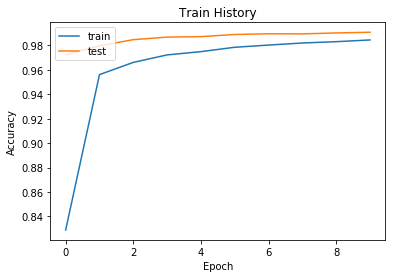

In [83]:
show_train_history('acc','val_acc')

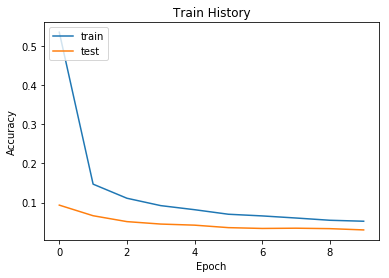

In [84]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [37]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 3s 270us/step


0.99280000000000002

# 預測結果

In [38]:
prediction=model.predict_classes(x_Test4D_normalize)

In [39]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

# 查看預測結果

In [40]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

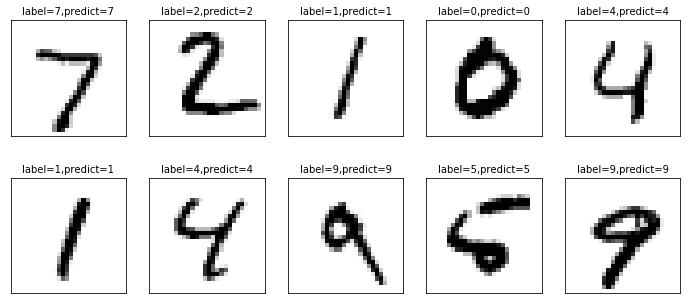

In [41]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# confusion matrix


In [42]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,1,0,0,1,0,1,0
1,0,1130,1,2,0,0,1,1,0,0
2,1,1,1024,0,2,0,0,1,3,0
3,0,0,0,1007,0,1,0,0,2,0
4,0,0,0,0,979,0,0,0,1,2
5,2,0,0,12,0,875,1,0,1,1
6,1,2,0,0,1,2,951,0,1,0
7,0,3,3,2,0,0,0,1016,1,3
8,1,0,1,2,0,0,0,0,968,2


In [43]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [44]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1299,5,3
1393,5,3
1737,5,3
2035,5,3
2369,5,3
2597,5,3
2810,5,3
2970,5,3
3157,5,3


In [45]:
df[(df.label==5)&(df.predict==3)].index

Int64Index([340, 1299, 1393, 1737, 2035, 2369, 2597, 2810, 2970, 3157, 4360,
            5937],
           dtype='int64')

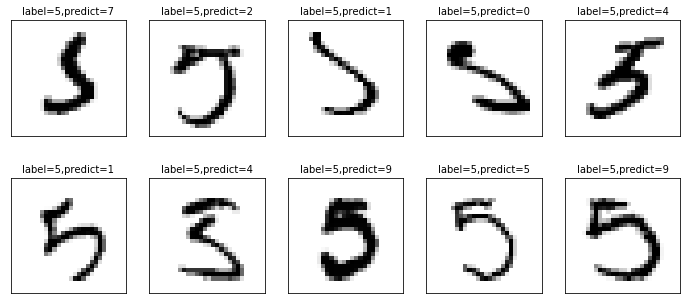

In [46]:
plot_images_labels_prediction([x_Test[i] for i in df[(df.label==5)&(df.predict==3)].index],[y_Test[i] for i in df[(df.label==5)&(df.predict==3)].index],prediction,idx=0)